In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

## Generate some data

In [2]:
high = 2*np.pi
x = torch.unsqueeze(torch.linspace(-high, high, 20000), dim=1)
x = x[torch.randperm(x.shape[0])]

In [3]:
random_sin = np.random.uniform(low=-0.01, high=0.01, size=(x.shape[0], ))
random_cos = np.random.uniform(low=-0.01, high=0.01, size=(x.shape[0], ))

In [4]:
sin_y = (torch.sin(x[:,0]) + random_sin).reshape(-1, 1).double()
cos_y = (torch.cos(x[:, 0]) + random_cos).reshape(-1, 1).double()

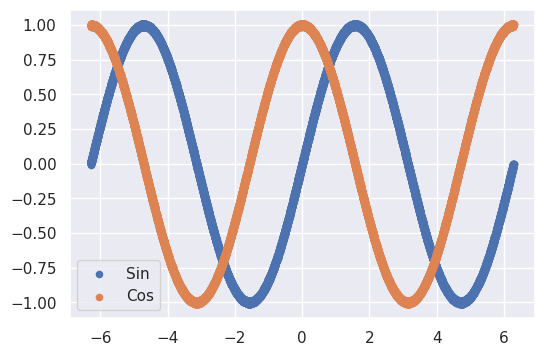

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(x[:, 0].reshape(-1, 1), sin_y, s=20, label = "Sin")
plt.scatter(x[:, 0].reshape(-1, 1), cos_y, s=20, label = "Cos")
plt.legend()
plt.show()

## Defining the network

In [6]:
class Net(nn.Module):
    
    def __init__(self, h):
        super(Net, self).__init__()
        
        self.model1 = torch.nn.Sequential(
                        torch.nn.Linear(x.shape[1], h),
                        torch.nn.ReLU(),
                        torch.nn.Linear(h, h),
                        torch.nn.ReLU(),
                        torch.nn.Linear(h, h),
                        torch.nn.ReLU()  
                        )
        
        self.model_sin = torch.nn.Sequential(
                        torch.nn.Linear(h, h),
                        torch.nn.ReLU(),
                        torch.nn.Linear(h, 1))
    
        self.model_cos = torch.nn.Sequential(
                        torch.nn.Linear(h, h),
                        torch.nn.ReLU(),
                        torch.nn.Linear(h, 1))
    
        
    def forward(self, inputs):
        
        x1 = self.model1(inputs)
        output_sin = self.model_sin(x1).double()
        output_cos = self.model_cos(x1).double()
        
        return output_sin, output_cos

### Train network

In [7]:
epochs = 100
learning_rate = 0.01

In [8]:
net = Net(150)
losses = []
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate)

for epoch in range(epochs):
    
    prediction = net(x)

    loss1 = loss_func(prediction[0], sin_y)
    loss2 = loss_func(prediction[1], cos_y)

    loss = loss1 + loss2
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    if (epoch+1)%5 == 0:
        print(f'Epoch = {epoch}, Loss: {round(loss.item(), 3)}')

Epoch = 4, Loss: 0.95
Epoch = 9, Loss: 0.801
Epoch = 14, Loss: 0.382
Epoch = 19, Loss: 0.278
Epoch = 24, Loss: 0.146
Epoch = 29, Loss: 0.09
Epoch = 34, Loss: 0.045
Epoch = 39, Loss: 0.024
Epoch = 44, Loss: 0.025
Epoch = 49, Loss: 0.01
Epoch = 54, Loss: 0.011
Epoch = 59, Loss: 0.003
Epoch = 64, Loss: 0.006
Epoch = 69, Loss: 0.002
Epoch = 74, Loss: 0.003
Epoch = 79, Loss: 0.001
Epoch = 84, Loss: 0.001
Epoch = 89, Loss: 0.001
Epoch = 94, Loss: 0.003
Epoch = 99, Loss: 0.004


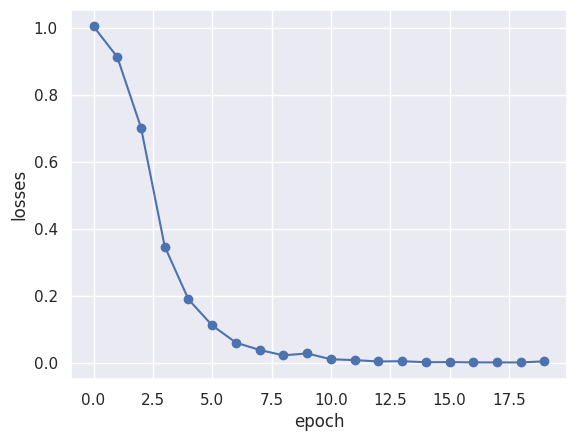

In [9]:
plt.plot(losses[::5], '-o')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.show()